# **LAB 2**

=========== FIRST 10 ROWS ===========
   Emails_Sent  Open_Rate  Click_Through_Rate  Bounce_Rate  Unsubscribe_Count  \
0         9270  10.115724            3.381377     1.457526                 23   
1         2860   6.951548            0.580071     7.451642                  6   
2         7390  33.466566           12.324191     6.503339                 57   
3         7191  33.968961           10.749431     5.140549                 48   
4         7734  29.251920           11.070604     6.997393                 36   
5         8265  14.138413           11.683420     6.468642                 74   
6         2466   7.930163            1.573647     1.655246                 36   
7         6426  25.526991            5.697753     7.161960                 72   
8         7578  18.204575            2.180101     4.406869                 59   
9        10322   8.661147           13.015000     6.498033                 79   

   Promo_Code_Used  Conversions  
0        17.608117    17.910783  
1 

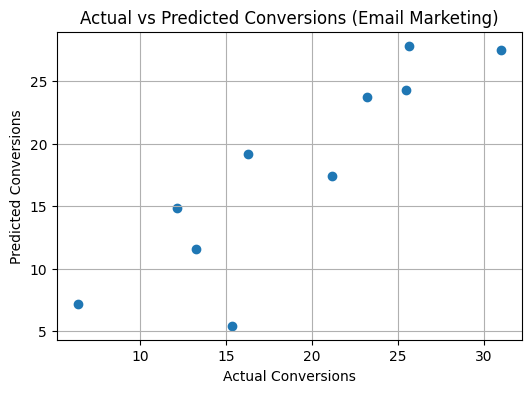

In [8]:
# =============================================================
# EMAIL MARKETING — MULTIPLE LINEAR REGRESSION (6 Inputs → 1 Output)
# DATA → MODEL → DECISION
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(42)



# ---------------------------------------------------------
# 1. SYNTHETIC EMAIL MARKETING DATA (40 DAYS)
# ---------------------------------------------------------

n_days = 40

Emails_Sent = np.random.randint(2000, 12000, n_days)            # total emails sent
Open_Rate = np.random.uniform(5, 35, n_days)                     # %
Click_Through_Rate = np.random.uniform(0.5, 15, n_days)          # %
Bounce_Rate = np.random.uniform(0.2, 8, n_days)                  # %
Unsubscribe_Count = np.random.randint(5, 80, n_days)             # #
Promo_Code_Used = np.random.uniform(0.5, 20, n_days)             # %






# True underlying function for conversions (with noise)
noise = np.random.normal(0, 4, n_days)

Conversions = (
    0.0015 * Emails_Sent +           # sending more emails helps
    0.35 * Open_Rate +               # open rate highly influences conversions
    0.75 * Click_Through_Rate +      # CTR is VERY important
    -0.60 * Bounce_Rate +            # bounce rate decreases conversions
    -0.12 * Unsubscribe_Count +      # losing subscribers reduces conversions
    0.40 * Promo_Code_Used +         # promo codes drive conversions
    noise
)






df = pd.DataFrame({
    "Emails_Sent": Emails_Sent,
    "Open_Rate": Open_Rate,
    "Click_Through_Rate": Click_Through_Rate,
    "Bounce_Rate": Bounce_Rate,
    "Unsubscribe_Count": Unsubscribe_Count,
    "Promo_Code_Used": Promo_Code_Used,
    "Conversions": Conversions
})






print("=========== FIRST 10 ROWS ===========")
print(df.head(10), "\n")













# ---------------------------------------------------------
# 2. CORRELATION ANALYSIS
# ---------------------------------------------------------

corr = df.corr(numeric_only=True)
print("=========== CORRELATION MATRIX ===========")
print(corr, "\n")

print("=========== CORRELATION WITH OUTPUT (Conversions) ===========")
print(corr["Conversions"].sort_values(ascending=False), "\n")













# ---------------------------------------------------------
# 3. MULTIPLE LINEAR REGRESSION MODEL
# ---------------------------------------------------------

X = df.drop(columns=["Conversions"])
y = df["Conversions"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)








# ---------------------------------------------------------
# 4. MODEL PERFORMANCE
# ---------------------------------------------------------

print("=========== MODEL PERFORMANCE ===========")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred), "\n")







# ---------------------------------------------------------
# 5. FEATURE EFFECT (COEFFICIENTS)
# ---------------------------------------------------------

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("=========== FEATURE COEFFICIENTS ===========")
print(coeff_df.to_string(index=False), "\n")

print("Intercept:", model.intercept_, "\n")











# ---------------------------------------------------------
# 6. DECISION MAKING — Email Marketing Strategy
# ---------------------------------------------------------

# Example: If we increase Emails_Sent by 20% and Promo_Code_Used by 10%
scenario = pd.DataFrame({
    "Emails_Sent": [10000 * 1.20],
    "Open_Rate": [20],
    "Click_Through_Rate": [10],
    "Bounce_Rate": [3],
    "Unsubscribe_Count": [25],
    "Promo_Code_Used": [12 * 1.10]
})

predicted_conversion = model.predict(scenario)[0]

print("=========== DECISION SCENARIO ===========")
print("Marketing Scenario → Increased Emails & Promo Code Usage")
print(f"Expected Conversions: {predicted_conversion:.2f}\n")







# ---------------------------------------------------------
# 7. PLOT ACTUAL vs PREDICTED
# ---------------------------------------------------------

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Conversions")
plt.ylabel("Predicted Conversions")
plt.title("Actual vs Predicted Conversions (Email Marketing)")
plt.grid(True)
plt.show()
